In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC  # support vector classifier

In [52]:
data = pd.read_table('Dataset/iris.data.txt',sep=',')
# Label
labels = data.iloc[:,4]
# 取2，3列的特征
x = data.iloc[:,:2]
#计算训练集的平均值和标准差，拟合数据，将它转化成标准形式
x = StandardScaler().fit_transform(x)
data_x = np.array(x)
print(data_x.shape)

label_y = np.array(labels)
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor', 'Iris-virginica'])
data_y = le.transform(label_y)
# print(data_y)

(149, 2)


In [53]:
# 划分数据集
x_train = data_x[:130]
y_train = data_y[:130]
x_test = data_x[-19:]
y_test = data_y[-19:]
#print(x_test.shape)

In [54]:
model = SVC(kernel='rbf',C=100000,gamma=1)
model.fit(x_train,y_train)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
print("kernel SVM 模型训练集准确率: %.3f" %metrics.accuracy_score(y_train,model.predict(x_train)))
y_hat = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_hat)
print("kernel SVM 模型测试集准确率: %.3f" %accuracy)
print(metrics.classification_report(y_test,y_hat))

kernel SVM 模型训练集准确率: 0.946
kernel SVM 模型测试集准确率: 0.526
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       1.00      0.53      0.69        19

avg / total       1.00      0.53      0.69        19



/Users/zhaoxu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## 可视化

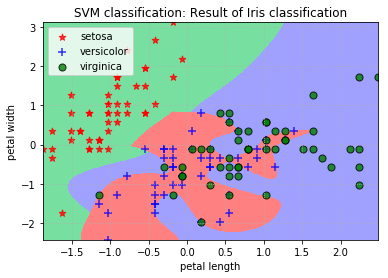

In [56]:
N, M = 500, 500 # 横纵各采样多少值
x1_min, x1_max = data_x[:,0].min(), data_x[:,0].max()
x2_min, x2_max = data_x[:,1].min(), data_x[:,1].max()
t1 = np.linspace(x1_min, x1_max,N)
t2 = np.linspace(x2_min, x2_max,M)
x1, y1 = np.meshgrid(t1, t2)    #生成网格采样点

x_test = np.stack((x1.flat,y1.flat),axis=1)     # 测试点(250000,2)
y_hat = model.predict(x_test)
y_hat = y_hat.reshape(x1.shape)

marker_list = ['*', '+', 'o']
label_list = ['setosa','versicolor','virginica']
cm_light = ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = ['r','b','g']

plt.pcolormesh(x1,y1,y_hat,cmap=cm_light)   #根据y_hat的值分类

# 将数据集中的点显示在分类好的平面上
plt.scatter(data_x[data_y ==0, 0],data_x[data_y ==0, 1],alpha=0.8, s=50,edgecolors='red',
             c=cm_dark[0], marker=marker_list[0], label=label_list[0])
plt.scatter(data_x[data_y ==1, 0],data_x[data_y ==1, 1],alpha=0.8, s=50,edgecolors='k',
             c=cm_dark[1], marker=marker_list[1], label=label_list[1])
plt.scatter(data_x[data_y ==2, 0],data_x[data_y ==2, 1],alpha=0.8, s=50,edgecolors='k',
             c=cm_dark[2], marker=marker_list[2], label=label_list[2])

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc=2)
# plt.xticks(())
# plt.yticks(())
plt.title("SVM classification: Result of Iris classification")
plt.grid(b=True,ls=':')
plt.show()